In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv("zomato.csv")
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [3]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [4]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [5]:
df.shape

(51717, 17)

In [6]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
nulllist=[]
for i in df.columns:
    if df[i].isnull().sum()>0:
        nulllist.append(i)
nulllist

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [8]:
for i in nulllist:
    print('{} has {} % of missing values'.format(i,np.round(df[i].isnull().sum()/len(df)*100,4)))

rate has 15.0337 % of missing values
phone has 2.3358 % of missing values
location has 0.0406 % of missing values
rest_type has 0.4389 % of missing values
dish_liked has 54.2916 % of missing values
cuisines has 0.087 % of missing values
approx_cost(for two people) has 0.669 % of missing values


###### Dish Liked has highest Missing Values = 54.2916% 
###### Location has lowest Missing Values = 0.0406%

In [9]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
df.dropna(axis='index',subset=['rate'],inplace=True)
df.shape

(43942, 17)

In [11]:
def split(x):                            #Remove /5 from ratings, consider only 0 index data
    return x.split('/')[0]

In [12]:
df['rate']=df['rate'].apply(split)

In [13]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table rate  votes                             phone  \
0          Yes        Yes  4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1    787                      080 41714161   
2          Yes         No  3.8    918                    +91 9663487993   
3           No         No  3.7     88                    +91 9620009302   
4           No         No  3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [14]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [15]:
df.replace('NEW',0,inplace=True)
df.replace('-',0,inplace=True)

In [16]:
df['rate']=df['rate'].astype(float)

In [17]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [22]:
df_rate=df.groupby('name')['rate'].mean().reset_index()              
df_rate.columns=['restaurants','avg_rating']
df_rate.head(20)

restaurants  avg_rating
0                           #FeelTheROLL    3.400000
1                             #L-81 Cafe    3.900000
2                                #refuel    3.700000
3                               1000 B.C    3.200000
4   100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C    3.700000
5             11 to 11 Express Biriyanis    3.500000
6                     1131 Bar + Kitchen    4.500000
7              12th Main - Grand Mercure    4.100000
8                          1441 Pizzeria    4.100000
9                         1522 - The Pub    4.212000
10                    154 Breakfast Club    4.000000
11                     1722 Urban Bistro    4.100000
12                          18+ Ice Cafe    3.500000
13                                  1947    4.021429
14                      1980s Games Cafe    3.400000
15                    1992 Chats - Space    3.700000
16                                   1Q1    4.300000
17                          1TO3 Kitchen    3.100000
18                              2 Statez    3.700000
19         20 Char - Sterlings MAC Hotel    4.000000

D:\Software\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_rating', ylabel='Density'>

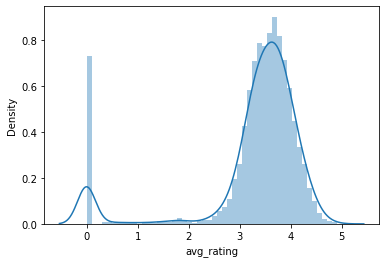

In [23]:
sns.distplot(df_rate['avg_rating'])

###### Average Rating of Restaurants is Normally Distributed

In [25]:
df_rate.shape

(7162, 2)

Text(0.5, 0, 'Number of Outlets')

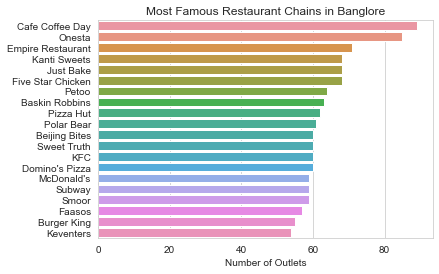

In [139]:
chains=df['name'].value_counts()[0:20]
sns.barplot(x=chains,y=chains.index)
plt.title('Most Famous Restaurant Chains in Banglore')
plt.xlabel('Number of Outlets')

In [39]:
x=df['online_order'].value_counts()
x

Yes    28308
No     15634
Name: online_order, dtype: int64

In [37]:
import plotly.express as px

In [52]:
px.pie(df,values=x,title='Online Order Acceptance',names=x.index)

In [56]:
y=df['book_table'].value_counts()
y

No     37509
Yes     6433
Name: book_table, dtype: int64

In [57]:
px.pie(df,values=y,names=y.index,title='Restaurants Provide Tables or Not')

In [77]:
df['rest_type'].isnull().sum()

151

In [78]:
df['rest_type'].dropna(inplace=True)

In [81]:
len(df['rest_type'].unique())

88

In [79]:
count=df['rest_type'].value_counts().head(20)
count

Quick Bites                   15073
Casual Dining                  9923
Cafe                           3527
Dessert Parlor                 1939
Delivery                       1791
Takeaway, Delivery             1472
Casual Dining, Bar             1141
Bakery                          775
Beverage Shop                   704
Bar                             661
Food Court                      526
Bar, Casual Dining              420
Lounge                          396
Pub                             356
Sweet Shop                      351
Fine Dining                     343
Casual Dining, Cafe             319
Pub, Casual Dining              255
Beverage Shop, Quick Bites      244
Bakery, Quick Bites             234
Name: rest_type, dtype: int64

Text(0.5, 1.0, 'Types Of Restaurants')

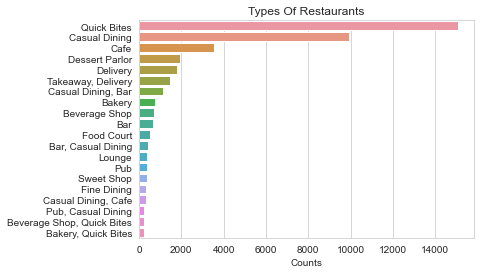

In [144]:
sns.barplot(x=count, y=count.index)
plt.xlabel('Counts')
plt.title('Types Of Restaurants')

###### We can conclude that Banglore is busy and fast moving city. So, People prefer Quick Bites Type Restaurants

Text(0.5, 1.0, 'Highest Voted Restaurants')

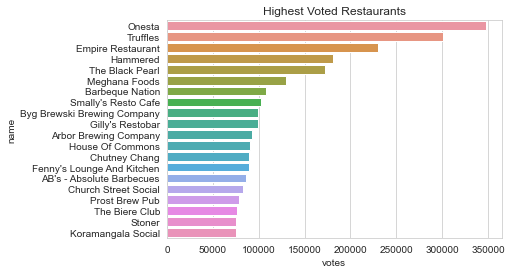

In [145]:
vote=df.groupby('name')['votes'].sum().nlargest(20)
sns.barplot(x=vote, y=vote.index)
plt.title('Highest Voted Restaurants')

In [134]:
cuisines=df['cuisines'].value_counts()[0:10]
cuisines

North Indian                           2294
North Indian, Chinese                  2060
South Indian                           1320
Cafe                                    653
Bakery, Desserts                        644
Biryani                                 641
South Indian, North Indian, Chinese     601
Fast Food                               580
Desserts                                572
Chinese                                 449
Name: cuisines, dtype: int64

Text(0, 0.5, 'Cuisines')

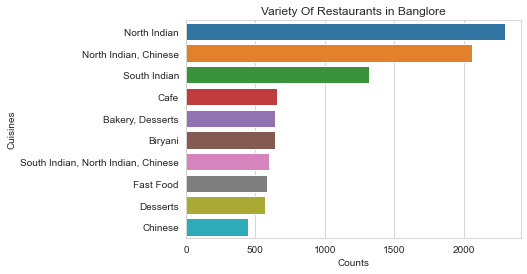

In [149]:
sns.barplot(x=cuisines, y=cuisines.index)
plt.title('Variety Of Restaurants in Banglore')
plt.xlabel('Counts')
plt.ylabel('Cuisines')

In [188]:
df['approx_cost(for two people)'].isnull().sum()

252

In [193]:
df.dropna(axis='index',subset=['approx_cost(for two people)'],inplace=True)

In [194]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [195]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [196]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [197]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [238]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(int)

In [280]:
df['approx_cost(for two people)'].dtype

dtype('int32')

D:\Software\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Density'>

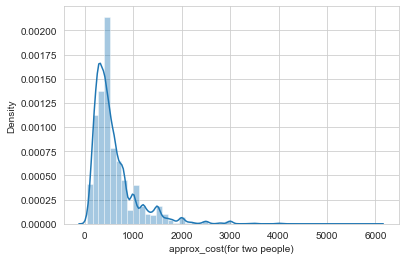

In [296]:
sns.distplot(df['approx_cost(for two people)'])

<AxesSubplot:xlabel='rate', ylabel='approx_cost(for two people)'>

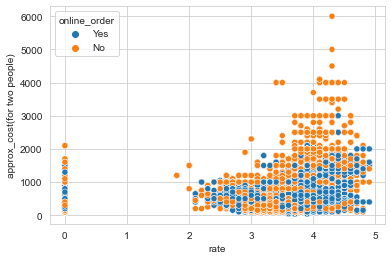

In [299]:
sns.scatterplot(x='rate',y='approx_cost(for two people)',hue='online_order', data=df)

###### High Rated Costly Restaurants don't Accept Online orders while Reasonable Restaurants Accepts

<AxesSubplot:xlabel='online_order', ylabel='votes'>

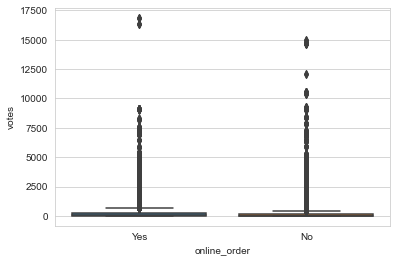

In [300]:
sns.boxplot(x='online_order', y='votes',data=df)

In [302]:
px.box(df,x='online_order', y='votes')

In [304]:
px.box(df,x='online_order', y='approx_cost(for two people)')

###### Restaurants Accepting online orders are more reasonable

In [305]:
df['approx_cost(for two people)'].min()

40

In [306]:
df['approx_cost(for two people)'].max()

6000

In [307]:
df[df['approx_cost(for two people)']==6000]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

###### Most Luxurious Restaurant in Banglore is = Le Cirque Signature - The Leela Palace

In [308]:
data=df.copy()

In [313]:
data.set_index('name',inplace=True)

KeyError: "None of ['name'] are in the columns"

In [314]:
data.head()

url  \
name                                                                       
Jalsa                  https://www.zomato.com/bangalore/jalsa-banasha...   
Spice Elephant         https://www.zomato.com/bangalore/spice-elephan...   
San Churro Cafe        https://www.zomato.com/SanchurroBangalore?cont...   
Addhuri Udupi Bhojana  https://www.zomato.com/bangalore/addhuri-udupi...   
Grand Village          https://www.zomato.com/bangalore/grand-village...   

                                                                 address  \
name                                                                       
Jalsa                  942, 21st Main Road, 2nd Stage, Banashankari, ...   
Spice Elephant         2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
San Churro Cafe        1112, Next to KIMS Medical College, 17th Cross...   
Addhuri Udupi Bhojana  1st Floor, Annakuteera, 3rd Stage, Banashankar...   
Grand Village          10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   

                      online_order book_table  rate  votes  \
name                                                         
Jalsa                          Yes        Yes   4.1    775   
Spice Elephant                 Yes         No   4.1    787   
San Churro Cafe                Yes         No   3.8    918   
Addhuri Udupi Bhojana           No         No   3.7     88   
Grand Village                   No         No   3.8    166   

                                                  phone      location  \
name                                                                    
Jalsa                    080 42297555\r\n+91 9743772233  Banashankari   
Spice Elephant                             080 41714161  Banashankari   
San Churro Cafe                          +91 9663487993  Banashankari   
Addhuri Udupi Bhojana                    +91 9620009302  Banashankari   
Grand Village          +91 8026612447\r\n+91 9901210005  Basavanagudi   

                                 rest_type  \
name                                         
Jalsa                        Casual Dining   
Spice Elephant               Casual Dining   
San Churro Cafe        Cafe, Casual Dining   
Addhuri Udupi Bhojana          Quick Bites   
Grand Village                Casual Dining   

                                                              dish_liked  \
name                                                                       
Jalsa                  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
Spice Elephant         Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
San Churro Cafe        Churros, Cannelloni, Minestrone Soup, Hot Choc...   
Addhuri Udupi Bhojana                                        Masala Dosa   
Grand Village                                        Panipuri, Gol Gappe   

                                             cuisines  \
name                                                    
Jalsa                  North Indian, Mughlai, Chinese   
Spice Elephant            Chinese, North Indian, Thai   
San Churro Cafe                Cafe, Mexican, Italian   
Addhuri Udupi Bhojana      South Indian, North Indian   
Grand Village                North Indian, Rajasthani   

                       approx_cost(for two people)  \
name                                                 
Jalsa                                          800   
Spice Elephant                                 800   
San Churro Cafe                                800   
Addhuri Udupi Bhojana                          300   
Grand Village                                  600   

                                                            reviews_list  \
name                                                                       
Jalsa                  [('Rated 4.0', 'RATED\n  A beautiful place to ...   
Spice Elephant         [('Rated 4.0', 'RATED\n  Had been here for din...   
San Churro Cafe        [('Rated 3.0', "RATED\n  Ambience is not that ...   
Addhuri Udupi Bhojana  [('Rated 4.0', "RA

Text(0.5, 1.0, 'Top 10 Most Expensive Restaurants in Banglore')

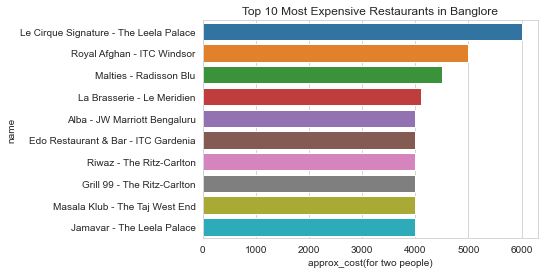

In [324]:
exp=data['approx_cost(for two people)'].nlargest(21)
sns.barplot(x=exp, y=exp.index)
plt.title('Top 10 Most Expensive Restaurants in Banglore')

Text(0.5, 1.0, 'Top 10 Least Expensive Restaurants in Banglore')

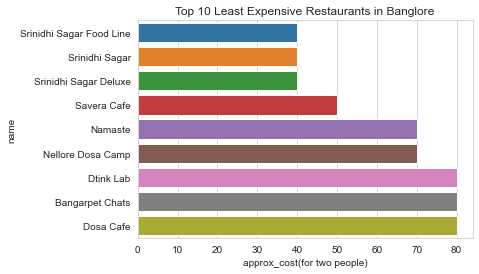

In [325]:
exp=data['approx_cost(for two people)'].nsmallest(21)
sns.barplot(x=exp, y=exp.index)
plt.title('Top 10 Least Expensive Restaurants in Banglore')

In [328]:
data[data['approx_cost(for two people)']<=500]

url  \
name                                                                                                    
Addhuri Udupi Bhojana                               https://www.zomato.com/bangalore/addhuri-udupi...   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley  https://www.zomato.com/bangalore/caf%C3%A9-dow...   
The Coffee Shack                                    https://www.zomato.com/bangalore/the-coffee-sh...   
Caf-Eleven                                          https://www.zomato.com/bangalore/caf-eleven-ba...   
T3H Cafe                                            https://www.zomato.com/bangalore/t3h-cafe-bana...   
...                                                                                               ...   
Venice Kerala Restaurant                            https://www.zomato.com/bangalore/venice-kerala...   
Thai & Chinese Fast Food                            https://www.zomato.com/bangalore/thai-chinese-...   
The Crunch                                          https://www.zomato.com/bangalore/the-crunch-br...   
Punjabi Charchay                                    https://www.zomato.com/bangalore/punjabi-charc...   
Raapchick                                           https://www.zomato.com/bangalore/raapchick-bro...   

                                                                                              address  \
name                                                                                                    
Addhuri Udupi Bhojana                               1st Floor, Annakuteera, 3rd Stage, Banashankar...   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley  12,29 Near PES University Back Gate, D'Souza N...   
The Coffee Shack                                        6th Block, 3rd Stage, Banashankari, Bangalore   
Caf-Eleven                                          111, Sapphire Toys Building, 100 Feet Ring Roa...   
T3H Cafe                                            504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   
...                                                                                               ...   
Venice Kerala Restaurant                            Opposite Brookfield Mall, Shiva Temple Road, B...   
Thai & Chinese Fast Food                            7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...   
The Crunch                                            33/1, Kundalahalli Road, Brookefield, Bangalore   
Punjabi Charchay                                    7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...   
Raapchick                                           Opposite Brookefield Mall, Kundanhalli, Brooke...   

                                                   online_order book_table  \
name                                                                         
Addhuri Udupi Bhojana                                        No         No   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley          Yes         No   
The Coffee Shack                                            Yes        Yes   
Caf-Eleven                                                   No         No   
T3H Cafe                                                     No         No   
...                                                         ...        ...   
Venice Kerala Restaurant                                     No         No   
Thai & Chinese Fast Food                                     No         No   
The Crunch                                                   No         No   
Punjabi Charchay                                             No         No   
Raapchick                                                   Yes         No   

                                                    rate  votes  \
name                                                              
Addhuri Udupi Bhojana                                3.7     88   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley   4.1    402   
The Coffee Shack                                     4.2    164   
Caf-Eleven      

In [332]:
df_budget=data[data['approx_cost(for two people)']<=500].loc[:,('approx_cost(for two people)')]
df_budget=df_budget.reset_index()
df_budget.head()

name  \
0                              Addhuri Udupi Bhojana   
1  CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...   
2                                   The Coffee Shack   
3                                         Caf-Eleven   
4                                           T3H Cafe   

   approx_cost(for two people)  
0                          300  
1                          500  
2                          500  
3                          450  
4                          300

# Spatial Analysis

In [336]:
df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)].shape

(2436, 17)

In [338]:
len(df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)]['name'].unique())

372

###### There are 372 Restaurant with rating >=4 and affordable too(500Rs)

In [341]:
df_new=df[(df['rate']>4) & (df['approx_cost(for two people)']<=500)]
df_new.head()

url  \
10  https://www.zomato.com/bangalore/caf%C3%A9-dow...   
12  https://www.zomato.com/bangalore/the-coffee-sh...   
34  https://www.zomato.com/bangalore/faasos-banash...   
51  https://www.zomato.com/bangalore/shree-cool-po...   
52  https://www.zomato.com/bangalore/corner-house-...   

                                              address  \
10  12,29 Near PES University Back Gate, D'Souza N...   
12      6th Block, 3rd Stage, Banashankari, Bangalore   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...   
51  1514, 4th Cross, 7th Main, RPC layout, 2nd Sta...   
52  808/6-1, 24th A Cross, K.R Road, 2nd Stage, Ba...   

                                                 name online_order book_table  \
10  CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...          Yes         No   
12                                   The Coffee Shack          Yes        Yes   
34                                             Faasos          Yes         No   
51                                   Shree Cool Point          Yes         No   
52                             Corner House Ice Cream           No         No   

    rate  votes                           phone      location       rest_type  \
10   4.1    402  080 26724489\r\n+91 7406048982  Banashankari            Cafe   
12   4.2    164                  +91 9731644212  Banashankari            Cafe   
34   4.2    415                  +91 7700020020  Banashankari     Quick Bites   
51   4.1     28                  +91 9900617124   Vijay Nagar     Quick Bites   
52   4.3    345  080 26713965\r\n+91 9845444155  Banashankari  Dessert Parlor   

                                           dish_liked  \
10  Waffles, Pasta, Crispy Chicken, Honey Chilli C...   
12  Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...   
34  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
51                                                NaN   
52  Hot Chocolate Fudge, Vanilla Ice Cream, Fudge ...   

                               cuisines  approx_cost(for two people)  \
10                                 Cafe                          500   
12  Cafe, Chinese, Continental, Italian                          500   
34     North Indian, Biryani, Fast Food                          500   
51    Fast Food, Street Food, Beverages                          150   
52                  Ice Cream, Desserts                          400   

                                         reviews_list  \
10  [('Rated 4.0', 'RATED\n  We ended up here on a...   
12  [('Rated 4.0', "RATED\n  Food - 4/5\nAmbience ...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   
51  [('Rated 5.0', 'RATED\n  Who would say no to s...   
52  [('Rated 3.0', "RATED\n  Always a fan of corne...   

                                            menu_item listed_in(type)  \
10                                                 []           Cafes   
12                                                 []           Cafes   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   
51  ['Vegetable Sandwich', 'Vegetable Sandwich wit...        Delivery   
52                                                 []        Delivery   

   listed_in(city)  
10    Banashankari  
12    Banashankari  
34    Banashankari  
51    Banashankari  
52    Banashankari

In [343]:
location=[]
total=[]
for loc, location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))    

In [344]:
location_df=pd.DataFrame(zip(location,total))
location_df.head()

0   1
0                BTM  28
1       Banashankari  16
2          Banaswadi   1
3  Bannerghatta Road   9
4       Basavanagudi  24

In [345]:
location_df.columns=['location','restaurant']

In [346]:
location_df.head()

location  restaurant
0                BTM          28
1       Banashankari          16
2          Banaswadi           1
3  Bannerghatta Road           9
4       Basavanagudi          24

In [349]:
def return_budget(location,restaurant):
    budget=df[(df['approx_cost(for two people)']<400) & (df['location']==location) & (df['rate']>4) & (df['rest_type']==restaurant)]
    return (budget['name'].unique())

In [350]:
return_budget('BTM','Quick Bites')

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop',
       'Yum In My Tum', 'Chaatimes', 'Swad Punjab Da', 'Roti Wala'],
      dtype=object)

D:\Software\ProgramFiles\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='location'>

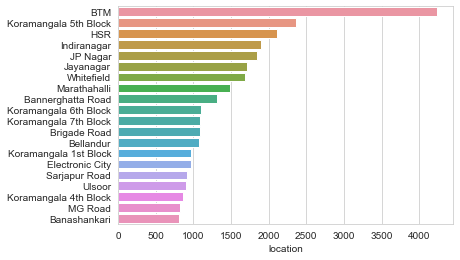

In [351]:
restaurant_location=df['location'].value_counts()[0:20]
sns.barplot(restaurant_location,restaurant_location.index)

###### BTM is the Most Foodie Location

# Geographical Analysis

In [352]:
locations=pd.DataFrame({'Name':df['location'].unique()})
locations.head()

Name
0        Banashankari
1        Basavanagudi
2         Mysore Road
3           Jayanagar
4  Kumaraswamy Layout

In [353]:
from geopy.geocoders import Nominatim       #Nominator is Open Street map

In [355]:
geolocator=Nominatim(user_agent='app')     #make connection with open Street Map

In [356]:
lat_lon=[]
for location in locations['Name']:
    location=geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:
        geo=(location.latitude, location.longitude)
        lat_lon.append(geo)

In [357]:
locations['geo_loc']=lat_lon

In [358]:
locations.head()

Name                           geo_loc
0        Banashankari          (15.8876779, 75.7046777)
1        Basavanagudi          (12.9417261, 77.5755021)
2         Mysore Road          (12.3872141, 76.6669626)
3           Jayanagar  (27.64392675, 83.05280519687284)
4  Kumaraswamy Layout          (12.9081487, 77.5553179)

In [359]:
locations.shape        

(92, 2)

In [360]:
rest_loc=pd.DataFrame(df['location'].value_counts().reset_index())
rest_loc.head()

index  location
0                    BTM      4237
1  Koramangala 5th Block      2358
2                    HSR      2113
3            Indiranagar      1892
4               JP Nagar      1849

In [363]:
rest_loc.columns=['Name','Count']
rest_loc.head()

Name  Count
0                    BTM   4237
1  Koramangala 5th Block   2358
2                    HSR   2113
3            Indiranagar   1892
4               JP Nagar   1849

In [365]:
rest_loc=rest_loc.merge(locations,on='Name',how='left').dropna()
rest_loc.head()

Name  Count                             geo_loc
0                    BTM   4237  (45.95485055, -112.49659530324134)
1  Koramangala 5th Block   2358             (12.9343774, 77.628415)
2                    HSR   2113                (18.1475, 41.538889)
3            Indiranagar   1892            (12.9732913, 77.6404672)
4               JP Nagar   1849            (12.2655944, 76.6465404)

In [367]:
np.array(rest_loc['geo_loc'])

array([(45.95485055, -112.49659530324134), (12.9343774, 77.628415),
       (18.1475, 41.538889), (12.9732913, 77.6404672),
       (12.2655944, 76.6465404), (27.64392675, 83.05280519687284),
       (44.3730577, -71.6118577), (12.9552572, 77.6984163),
       (12.887979, 77.5970812), (12.9400321, 77.6203272),
       (12.9302645, 77.6332585), (40.28745, -76.964526),
       (12.93577245, 77.66676103753434), (14.5395813, 121.070371),
       (-6.2659285, 106.7842561), (12.9242381, 77.6289059),
       (12.9778793, 77.6246697), (12.93433385, 77.63040639553275),
       (29.4534927, -98.6440138), (15.8876779, 75.7046777),
       (13.0221416, 77.6403368), (13.0027353, 77.5703253),
       (12.9417261, 77.5755021), (40.572423, -74.141107),
       (26.2660314, 73.0265996), (33.5935063, -79.0345627),
       (12.996845, 77.6130165), (40.7115227, -74.01043),
       (13.0093455, 77.6377094), (13.0346384, 77.5681733),
       (40.7652844, -76.373824), (13.0141618, 77.6518539),
       (12.9882338, 77.554883

In [368]:
lat,lon=zip(*np.array(rest_loc['geo_loc']))

In [369]:
type(lat)

tuple

In [370]:
rest_loc['lat']=lat
rest_loc['lon']=lon

In [371]:
rest_loc.head()

Name  Count                             geo_loc  \
0                    BTM   4237  (45.95485055, -112.49659530324134)   
1  Koramangala 5th Block   2358             (12.9343774, 77.628415)   
2                    HSR   2113                (18.1475, 41.538889)   
3            Indiranagar   1892            (12.9732913, 77.6404672)   
4               JP Nagar   1849            (12.2655944, 76.6465404)   

         lat         lon  
0  45.954851 -112.496595  
1  12.934377   77.628415  
2  18.147500   41.538889  
3  12.973291   77.640467  
4  12.265594   76.646540

In [372]:
rest_loc.drop('geo_loc',axis=1,inplace=True)

In [373]:
rest_loc.head()

Name  Count        lat         lon
0                    BTM   4237  45.954851 -112.496595
1  Koramangala 5th Block   2358  12.934377   77.628415
2                    HSR   2113  18.147500   41.538889
3            Indiranagar   1892  12.973291   77.640467
4               JP Nagar   1849  12.265594   76.646540

In [374]:
import folium
from folium.plugins import HeatMap

In [382]:
def generatebasemap(default_location=[12.97,77.59],default_zoom_start=12):
    basemap=folium.Map(location=default_location,zoom_start=default_zoom_start)
    return basemap

In [383]:
basemap=generatebasemap()

In [385]:
basemap

In [390]:
HeatMap(rest_loc[['lat','lon','Count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

In [406]:
df2=df[df['cuisines']=='North Indian']
df2.head()

url  \
5   https://www.zomato.com/bangalore/timepass-dinn...   
50  https://www.zomato.com/bangalore/petoo-banasha...   
72  https://www.zomato.com/bangalore/spicy-tandoor...   
87  https://www.zomato.com/bangalore/krishna-sagar...   
94  https://www.zomato.com/bangalore/nandhini-delu...   

                                              address             name  \
5   37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...  Timepass Dinner   
50  276, Ground Floor, 100 Feet Outer Ring Road, B...            Petoo   
72  Opposite ICICi Bank, Hanuman Nagar, Banashanka...    Spicy Tandoor   
87  38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...    Krishna Sagar   
94  304, Opposite Apollo Public School, 100 Feet R...  Nandhini Deluxe   

   online_order book_table  rate  votes                             phone  \
5           Yes         No   3.8    286  +91 9980040002\r\n+91 9980063005   
50           No         No   3.7     21                    +91 8026893211   
72           No         No   0.0      0                    +91 8050884222   
87           No         No   3.5     31  +91 8892752997\r\n+91 7204780429   
94           No         No   2.6    283      080 26890011\r\n080 26890033   

        location      rest_type  \
5   Basavanagudi  Casual Dining   
50  Banashankari    Quick Bites   
72  Banashankari    Quick Bites   
87  Banashankari    Quick Bites   
94  Banashankari  Casual Dining   

                                           dish_liked      cuisines  \
5   Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...  North Indian   
50                                                NaN  North Indian   
72                                                NaN  North Indian   
87                                                NaN  North Indian   
94  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...  North Indian   

    approx_cost(for two people)  \
5                           600   
50                          450   
72                          150   
87                          200   
94                          600   

                                         reviews_list menu_item  \
5   [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   
50  [('Rated 2.0', 'RATED\n  This is a neatly made...        []   
72  [('Rated 4.0', 'RATED\n  cost for chicken roll...        []   
87  [('Rated 1.0', 'RATED\n  Worst experience with...        []   
94  [('Rated 3.0', 'RATED\n  Ididnt like much.\n\n...        []   

   listed_in(type) listed_in(city)  
5           Buffet    Banashankari  
50        Delivery    Banashankari  
72        Delivery    Banashankari  
87        Delivery    Banashankari  
94        Delivery    Banashankari

In [407]:
north_india=df2.groupby(['location'],as_index=False)['url'].agg('count')
north_india.head()

location  url
0                BTM  262
1       Banashankari   35
2          Banaswadi    9
3  Bannerghatta Road   60
4       Basavanagudi   17

In [408]:
north_india.columns=['Name','count']
north_india.head()

Name  count
0                BTM    262
1       Banashankari     35
2          Banaswadi      9
3  Bannerghatta Road     60
4       Basavanagudi     17

In [409]:
north_india=north_india.merge(locations,on='Name',how='left').dropna()
north_india.head()

Name  count                             geo_loc
0                BTM    262  (45.95485055, -112.49659530324134)
1       Banashankari     35            (15.8876779, 75.7046777)
2          Banaswadi      9            (13.0141618, 77.6518539)
3  Bannerghatta Road     60             (12.887979, 77.5970812)
4       Basavanagudi     17            (12.9417261, 77.5755021)

In [410]:
north_india['lat'],north_india['lon']=zip(*north_india['geo_loc'].values)
north_india.head()

Name  count                             geo_loc        lat  \
0                BTM    262  (45.95485055, -112.49659530324134)  45.954851   
1       Banashankari     35            (15.8876779, 75.7046777)  15.887678   
2          Banaswadi      9            (13.0141618, 77.6518539)  13.014162   
3  Bannerghatta Road     60             (12.887979, 77.5970812)  12.887979   
4       Basavanagudi     17            (12.9417261, 77.5755021)  12.941726   

          lon  
0 -112.496595  
1   75.704678  
2   77.651854  
3   77.597081  
4   77.575502

In [411]:
north_india.drop('geo_loc', axis=1, inplace=True)
north_india.head()

Name  count        lat         lon
0                BTM    262  45.954851 -112.496595
1       Banashankari     35  15.887678   75.704678
2          Banaswadi      9  13.014162   77.651854
3  Bannerghatta Road     60  12.887979   77.597081
4       Basavanagudi     17  12.941726   77.575502

In [413]:
basemap=generatebasemap()
HeatMap(north_india[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

In [415]:
df_1=df.groupby(['rest_type','name']).agg('count')
df_1.head()

url  address  online_order  book_table  rate  \
rest_type name                                                              
Bakery    7th Heaven           2        2             2           2     2   
          A Little For Love    1        1             1           1     1   
          Adarsh Bakery        2        2             2           2     2   
          Adi's Cake N Cafe    2        2             2           2     2   
          Albert Bakery        1        1             1           1     1   

                             votes  phone  location  dish_liked  cuisines  \
rest_type name                                                              
Bakery    7th Heaven             2      2         2           0         2   
          A Little For Love      1      1         1           0         1   
          Adarsh Bakery          2      2         2           0         2   
          Adi's Cake N Cafe      2      2         2           0         2   
          Albert Bakery          1      1         1           1         1   

                             approx_cost(for two people)  reviews_list  \
rest_type name                                                           
Bakery    7th Heaven                                   2             2   
          A Little For Love                            1             1   
          Adarsh Bakery                                2             2   
          Adi's Cake N Cafe                            2             2   
          Albert Bakery                                1             1   

                             menu_item  listed_in(type)  listed_in(city)  
rest_type name                                                            
Bakery    7th Heaven                 2                2                2  
          A Little For Love          1                1                1  
          Adarsh Bakery              2                2                2  
          Adi's Cake N Cafe          2                2                2  
          Albert Bakery              1                1                1

In [416]:
df_1.sort_values(['url'],ascending=False)

url  address  online_order  \
rest_type           name                                              
Cafe                Cafe Coffee Day       89       89            89   
Casual Dining, Cafe Onesta                85       85            85   
Quick Bites         Five Star Chicken     67       67            67   
                    Domino's Pizza        60       60            60   
                    McDonald's            59       59            59   
...                                      ...      ...           ...   
                    New Students Corner    1        1             1   
Dessert Parlor      Mr Gola                1        1             1   
Casual Dining       Parijatha Paradise     1        1             1   
                    Parijatha Fish Land    1        1             1   
Delivery            SaJuSo                 1        1             1   

                                         book_table  rate  votes  phone  \
rest_type           name                                                  
Cafe                Cafe Coffee Day              89    89     89     86   
Casual Dining, Cafe Onesta                       85    85     85     85   
Quick Bites         Five Star Chicken            67    67     67     62   
                    Domino's Pizza               60    60     60     60   
                    McDonald's                   59    59     59     59   
...                                             ...   ...    ...    ...   
                    New Students Corner           1     1      1      1   
Dessert Parlor      Mr Gola                       1     1      1      1   
Casual Dining       Parijatha Paradise            1     1      1      1   
                    Parijatha Fish Land           1     1      1      1   
Delivery            SaJuSo                        1     1      1      1   

                                         location  dish_liked  cuisines  \
rest_type           name                                                  
Cafe                Cafe Coffee Day            89          31        89   
Casual Dining, Cafe Onesta                     85          85        85   
Quick Bites         Five Star Chicken          67          10        67   
                    Domino's Pizza             60          55        60   
                    McDonald's                 59          57        59   
...                                           ...         ...       ...   
                    New Students Corner         1           0         1   
Dessert Parlor      Mr Gola                     1           0         1   
Casual Dining       Parijatha Paradise          1           0         1   
                    Parijatha Fish Land         1           0         1   
Delivery            SaJuSo                      1           0         1   

                                         approx_cost(for two people)  \
rest_type           name                                               
Cafe                Cafe Coffee Day                               89   
Casual Dining, Cafe Onesta                                        85   
Quick Bites         Five Star Chicken                             67   
                    Domino's Pizza                                60   
                    McDonald's                                    59   
...                                                              ...   
                    New Students Corner                            1   
Dessert Parlor      Mr Gola                                        1   
Casual Dining       Parijatha Paradise                             1   
                    Parijatha Fish Land                            1   
Delivery            SaJuSo                                         1   

                                         reviews_list  menu_item  \
rest_type           name                                           
Cafe                Cafe Coffee Day                89         89   
Casual Dining, Cafe Ones

In [418]:
df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],as_index=False).apply(lambda x: x.sort_values(by='url',ascending=False))

url  address  online_order  \
   rest_type          name                                                     
0  Bakery             Just Bake                    44       44            44   
                      Warm Oven                    28       28            28   
                      INDULGE by InnerChef         28       28            28   
                      Karachi Bakery               26       26            26   
                      CakeZone                     21       21            21   
...                                               ...      ...           ...   
86 Takeaway, Delivery Agraharam Meal                1        1             1   
                      Adyar Ananda Bhavan Sweets    1        1             1   
                      Faasos                        1        1             1   
                      @North Parontha Hut           1        1             1   
                      Lucky Singh & Co              1        1             1   

                                                  book_table  rate  votes  \
   rest_type          name                                                  
0  Bakery             Just Bake                           44    44     44   
                      Warm Oven                           28    28     28   
                      INDULGE by InnerChef                28    28     28   
                      Karachi Bakery                      26    26     26   
                      CakeZone                            21    21     21   
...                                                      ...   ...    ...   
86 Takeaway, Delivery Agraharam Meal                       1     1      1   
                      Adyar Ananda Bhavan Sweets           1     1      1   
                      Faasos                               1     1      1   
                      @North Parontha Hut                  1     1      1   
                      Lucky Singh & Co                     1     1      1   

                                                  phone  location  dish_liked  \
   rest_type          name                                                      
0  Bakery             Just Bake                      44        44          14   
                      Warm Oven                      28        28           7   
                      INDULGE by InnerChef           28        28           0   
                      Karachi Bakery                 24        26           3   
                      CakeZone                       21        21          10   
...                                                 ...       ...         ...   
86 Takeaway, Delivery Agraharam Meal                  1         1           1   
                      Adyar Ananda Bhavan Sweets      1         1           0   
                      Faasos                          1         1           1   
                      @North Parontha Hut             1         1           0   
                      Lucky Singh & Co                1         1           1   

                                                  cuisines  \
   rest_type          name                                   
0  Bakery             Just Bake                         44   
                      Warm Oven                         28   
                      INDULGE by InnerChef              28   
                      Karachi Bakery                    26   
                      CakeZone                          21   
...                                                    ...   
86 Takeaway, Delivery Agraharam Meal                     1   
                      Adyar Ananda Bhavan Sweets         1   
                      Faasos                             1   
                      @North Parontha Hut                1   
                      Lucky Singh & Co                   1   

                                                  approx_cost(for two people)  \
   rest_type          name                                       

In [420]:
df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],as_index=False).apply(lambda x: x.sort_values(by='url',ascending=False))['url'].reset_index()

level_0           rest_type                        name  url
0           0              Bakery                   Just Bake   44
1           0              Bakery                   Warm Oven   28
2           0              Bakery        INDULGE by InnerChef   28
3           0              Bakery              Karachi Bakery   26
4           0              Bakery                    CakeZone   21
...       ...                 ...                         ...  ...
7707       86  Takeaway, Delivery              Agraharam Meal    1
7708       86  Takeaway, Delivery  Adyar Ananda Bhavan Sweets    1
7709       86  Takeaway, Delivery                      Faasos    1
7710       86  Takeaway, Delivery         @North Parontha Hut    1
7711       86  Takeaway, Delivery            Lucky Singh & Co    1

[7712 rows x 4 columns]

In [423]:
dataset=df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],as_index=False).apply(lambda x: x.sort_values(by='url',ascending=False))['url'].reset_index().rename(columns={'url':'count'})
dataset

level_0           rest_type                        name  count
0           0              Bakery                   Just Bake     44
1           0              Bakery                   Warm Oven     28
2           0              Bakery        INDULGE by InnerChef     28
3           0              Bakery              Karachi Bakery     26
4           0              Bakery                    CakeZone     21
...       ...                 ...                         ...    ...
7707       86  Takeaway, Delivery              Agraharam Meal      1
7708       86  Takeaway, Delivery  Adyar Ananda Bhavan Sweets      1
7709       86  Takeaway, Delivery                      Faasos      1
7710       86  Takeaway, Delivery         @North Parontha Hut      1
7711       86  Takeaway, Delivery            Lucky Singh & Co      1

[7712 rows x 4 columns]

In [425]:
casual=dataset[dataset['rest_type']=='Casual Dining']
casual

level_0      rest_type  \
1001       24  Casual Dining   
1002       24  Casual Dining   
1003       24  Casual Dining   
1004       24  Casual Dining   
1005       24  Casual Dining   
...       ...            ...   
2635       24  Casual Dining   
2636       24  Casual Dining   
2637       24  Casual Dining   
2638       24  Casual Dining   
2639       24  Casual Dining   

                                                   name  count  
1001                                  Empire Restaurant     58  
1002                                      Beijing Bites     48  
1003                                 Mani's Dum Biryani     47  
1004                                          Chung Wah     46  
1005                                       Oye Amritsar     41  
...                                                 ...    ...  
2635  Uppercut - Sheraton Grand Bengaluru Whitefield...      1  
2636                                   Utsav Restaurant      1  
2637                                  VMS Star Biriyani      1  
2638                             Veruthe Oru Thattukada      1  
2639                                Parijatha Fish Land      1  

[1639 rows x 4 columns]